In [46]:
#useful packages
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
from torch.autograd import grad
import torch.nn as nn
import torch.optim as optim
import random
from scipy.integrate import odeint


### Examples of numpy from Mechanics of solids

In [47]:
v = np.array([1., 2., 3.])
A = np.array([[1., 2., 3.], [2., 4., 5.], [3., 5., 6.]])
#print(A)

# dot product
v @ v
v.dot(v)
np.inner(v, v)
np.einsum('i,i', v, v)

# vector product
w=np.array([3.,4.,5.])
c=np.cross(v,w)

# open product
# vectors
np.outer(v, v) # attention, if you use np.outer on a multi-dim array, it flattens it to a vector
np.einsum('i,j', v, v)
# higher order tensors
np.einsum('ij,kl', A, A)

#2nd order unit tensor
delta=np.eye(3)

# single contraction
# A \cdot v
A @ v
A.dot(v)
np.inner(A, v)
np.einsum('ij,j', A, v)
# c \cdot A
v @ A
v.dot(A)
# don’t use np.inner(v, A)!
np.einsum('i,ij', v, A)

# double contraction
# A : A
np.tensordot(A, A, 2)
np.einsum('ij,ij', A, A)

# trace
np.trace(A)
np.einsum('ii', A)

# determinant
np.linalg.det(A)

# matrix power
# A^3
np.linalg.matrix_power(A, 3)

# eigenvalue problem
la, n=np.linalg.eig(A)

# transpose of matrix
A.T

# inverse of matrix
np.linalg.inv(A)

# solve equation system A x= v
np.linalg.inv(A)@v
np.linalg.solve(A,v) #quicker



array([1.00000000e+00, 1.66533454e-16, 0.00000000e+00])

### Examples of plotting

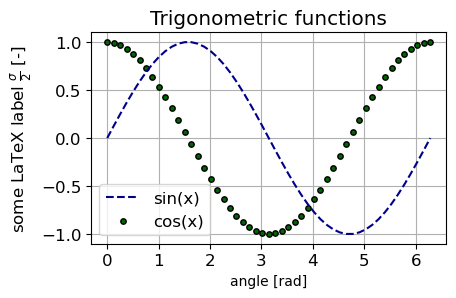

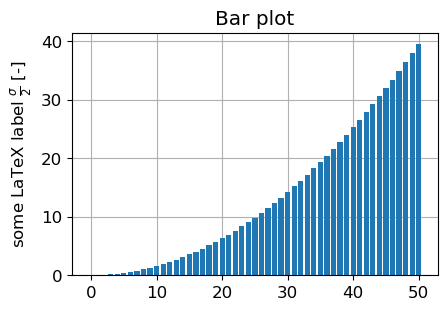

In [48]:

# generate some data
x = np.linspace(0, 2*np.pi, 51)
y1 = np.sin(x)
y2 = np.cos(x)

# set all fontsizes to 12
rcParams["font.size"] = 12
rcParams["axes.axisbelow"] = True # make sure grid is behind plots

# choose a figure size
size_in_inch = (12.0/2.54, 8.0/2.54) # 12cm x 8cm
# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Add Labels to the Axis
ax.set_xlabel('angle [rad]', fontsize=10)    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_ylabel(r'some LaTeX label $\frac{\sigma}{2}$ [-]')
ax.set_title('Trigonometric functions')

# Background grid
ax.grid(visible=True)

# plot sine and cosine curves
ax.plot(x, y1, label='sin(x)', linestyle='--', color='darkblue')    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
ax.scatter(x, y2, s=15, marker='o', facecolors='darkgreen', edgecolors='black', label='cos(x)')     # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html

# Always use a Legend if you have several plots within a single Axis
ax.legend(loc='best')   # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

# nicer layout
fig.tight_layout()  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Make sure to use a sufficient resolution when saving pixel graphics
fig.savefig('example_python.png', dpi=600)     # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# Or better use vector graphics (e.g. .eps, .svg, .pdf)
fig.savefig('example_python.svg') # Word likes .svg, Latex prefers .eps or .pdf

# display the figure 
plt.show()

#bar example
z=x**2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
plt.bar(range(len(z)), z)
ax.set_ylabel(r'some LaTeX label $\frac{\sigma}{2}$ [-]')
ax.set_title('Bar plot')
ax.grid(visible=True)

### Examples of function:

In [49]:
def sample_correlation_coeff(Xi,Yi): 
    X1=Xi[:]-np.sum(Xi[:])/len(Xi)
    Y1=Yi[:]-np.sum(Yi[:])/len(Yi)
    return X1@Y1/( m.sqrt(X1@X1)*m.sqrt(Y1@Y1) )


distLoad = lambda x: -2*(3*x**2 - 2*x)*np.pi*torch.cos(2*np.pi*x) + 4*(x**3 - x**2 + 1)*np.pi**2*torch.sin(2*np.pi*x)

### Examples of basic python commands

In [50]:
#if statements

def testar(a,b): 
    if b>a:
        print('b>a')
    elif b<a:
        print('b<a')
    elif b==a:
        print('b=a')
    return

for i in range(2):
    print('i=',i)


i= 0
i= 1


### SVD commands

In [51]:
X=np.array([[1.,2.],[3.,4.],[5.,6.]])
#SVD of X
U, S, VT=np.linalg.svd(X,full_matrices=True)

#economy SVD of X
Uec, Sec, VTec=np.linalg.svd(X,full_matrices=False)

#compute L2 norm of matrix
np.linalg.norm(X,2)

#Pseudo inverse
A_pinv=np.linalg.pinv(A)

### Load external data 

In [52]:
# Load data from .csv file
A = np.loadtxt(os.path.join('SVD/DATA','hald_ingredients.csv'),delimiter=',')


#Load data from .mat file, example
mat_file=sio.loadmat('SVD/DATA/heat_equation_result.mat')
x=mat_file['x'] # Position vector 
t=mat_file['t'] # Time vector


### Generation of random numbers

In [53]:
np.random.seed(0) # for getting out the same random variables every time (reproducability)
nrows=3; ncolumns=4
np.random.rand(nrows,ncolumns) #gives matrix with random number between 0 and 1
np.random.randn(nrows,ncolumns) #gives matrix with random number using a normal (Gaussian) distribution with mean 0 and variance 1


torch.manual_seed(0)  ## Set a random seed for reproducibility
torch.rand(nrows,ncolumns)
torch.randn(nrows,ncolumns)



# Create a list from 1 to 4
original_list = [1, 2, 3, 4]
# Randomly shuffle the list
shuffled_list = random.sample(original_list, len(original_list))


## For generation of combinations of data sets

In [54]:

# Initialize an empty list to store all combinations
all_combinations = []

# Recursive function to generate all combinations of data points with certain count left out
def generate_combinations(data_points, leave_out_count, start, comb=[]):
    # Base case: if the combination length matches the desired leave_out_count
    if len(comb) == len(data_points) - leave_out_count:
        all_combinations.append(comb)  # Add this combination to the list
        return
    # Generate combinations recursively
    for i in range(start, len(data_points)):
        generate_combinations(data_points, leave_out_count, i + 1, comb + [data_points[i]])

# Function to generate left out points and remaining points combinations
def left_out_points_fcn(data_points, leave_out_count):
    generate_combinations(data_points, leave_out_count, 0)
    
    # Initialize lists to store left out points and remaining points
    left_out_points = []
    
    # Iterate through combinations and find left out points
    for combination in all_combinations:
        left_out_points.append(np.setdiff1d(data_points, combination))
    
    return np.array(left_out_points), np.array(all_combinations)

# Example of usage:
# List of 4 data points
data_points = np.array([1, 2, 4, 5])
# Number of data points to leave out
leave_out_count = 2
# Get left out points and remaining points combinations
left_out_points, remaining_points = left_out_points_fcn(data_points, leave_out_count)

# Print the results
print("Left Out Points:\n", left_out_points)
print("\nRemaining Points Combinations:\n", remaining_points)


Left Out Points:
 [[4 5]
 [2 5]
 [2 4]
 [1 5]
 [1 4]
 [1 2]]

Remaining Points Combinations:
 [[1 2]
 [1 4]
 [1 5]
 [2 4]
 [2 5]
 [4 5]]


## Pytorch and NumPy

In [55]:
#######################
#Matrix multiplication
A=np.random.rand(3,4); B=np.random.rand(4,2)
A_tensor=torch.from_numpy(A).float(); B_tensor=torch.from_numpy(B).float()
result = np.dot(A, B)
result = torch.mm(A_tensor, B_tensor)

#element-wise exponential fcn
result = np.exp(A)
result = torch.exp(A_tensor)

#Element-wise Square Root:
result = np.sqrt(A)
result = torch.sqrt(A_tensor)

#Summation
result = np.sum(A)
result = torch.sum(A_tensor)

#Transpose
result = np.transpose(A)
result = torch.transpose(A_tensor, 0, 1)

#Reshape
result = np.reshape(A, (12,1))
result = torch.reshape(A_tensor, (12,1))

#######################


## Autograd example

In [56]:
#example autograd
# Create a tensor x with requires_grad=True to indicate we want to compute gradients w.r.t. it
x = torch.ones(1, requires_grad=True)

# Define a function y using the tensor x, involving mathematical operations
y = x**2 - 3*x + 4

# Compute the gradient (derivative) of y with respect to x using automatic differentiation
y.backward()

# Access the gradient of y w.r.t. x using x.grad
dy_dx = x.grad
print("Gradient dy/dx:", dy_dx)

# Convert the gradient tensor to a NumPy array using detach() and numpy()
dy_dx_np = dy_dx.detach().numpy()
print("Gradient in NumPy:", dy_dx_np)



Gradient dy/dx: tensor([-1.])
Gradient in NumPy: [-1.]


## Gradient descent example PyTorch

In [57]:
#######################
#simple gradient descent example
# Given data
x = torch.tensor([0, 2, 3])
y = torch.tensor([1, 6, 7])

# Model function
def model_fcn(d, x):
    return d[0] + d[1] * x

# Objective function
def obj_fcn(d, x, y):
    return 0.5 * torch.sum((y - model_fcn(d, x))**2)

# Learning rate
alpha = 0.1

# Initial guess as a numpy array
previous_d_np = np.array([1., 1.])

# Maximum number of iterations
max_no_iterations = 200

# Iterate to optimize the parameters
for iter in range(max_no_iterations):
    # Convert the numpy array to a torch tensor with gradient tracking
    previous_d = torch.tensor(previous_d_np, requires_grad=True)
    
    # Calculate the objective function value
    current_obj_fcn = obj_fcn(previous_d, x, y)
    
    # Compute gradients using automatic differentiation
    current_obj_fcn.backward()
    grad_obj_fcn = previous_d.grad
    
    # Update parameters using gradient descent
    previous_d = previous_d - alpha * grad_obj_fcn
    
    # Reset gradients for the next iteration
    previous_d.grad = None
    
    # Convert back to a numpy array
    previous_d_np = previous_d.detach().numpy()
    
    # Check for convergence based on gradient magnitude
    if torch.sum(grad_obj_fcn * grad_obj_fcn) < 10**(-3):
        print('Convergence')
        break
    elif iter == (max_no_iterations - 1):
        print('No convergence')
        break

# Print the results
print('Iter =', iter, 'Objective =', current_obj_fcn.detach().numpy(), 'd =', previous_d.detach().numpy())


Convergence
Iter = 19 Objective = 0.32194240780133204 d = [1.24215983 2.05988127]


In [58]:

###############
#Example using Pytorch Adagrad

#solution with pytorch optimizer
from torch.optim import Adagrad
#Solution with torch and Adagrad
initial_d=np.array([1.,1.])
d = torch.tensor(initial_d, requires_grad=True)
optimizer = Adagrad([d], lr=0.1)  
# Convergence criterion
threshold = 1e-7


# Perform optimization
prev_d = d.clone().detach()
iteration = 0

num_iterations=10000
prev_loss=1.e10

while True:
    # Clear gradients
    optimizer.zero_grad()

    # Evaluate the function
    loss = obj_fcn(d,x,y)

    # Compute gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    ## Check convergence criterion
    d_d=d.detach().numpy() - prev_d.detach().numpy()
    if np.sqrt( np.sum(d_d*d_d) ) < threshold : 
        print('d_d small')
        break

    # Update previous parameter values
    prev_d = d.clone().detach()
    prev_loss=loss
    iteration += 1

    if iteration >= num_iterations:
        print('too many iterations')
        break

# Print the final optimized values
print("Optimized values:")
print("d =", d)


d_d small
Optimized values:
d = tensor([1.2143, 2.0714], dtype=torch.float64, requires_grad=True)


In [59]:


###############
#Example using Pytorch LBFGS
import torch
import torch.optim as optim

# Define the Rosenbrock function as an example
def rosenbrock(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

# Initialize the parameters
initial_x = np.zeros(2)  # Initial guess for optimization
x = torch.tensor(initial_x, requires_grad=True)  # Convert initial guess to a PyTorch tensor

# Initialize the optimizer
optimizer = optim.LBFGS([x], lr=0.1)

# Closure function used for optimization
def closure():
    optimizer.zero_grad()  # Clear gradients from previous iteration
    loss = rosenbrock(x)  # Compute the loss (Rosenbrock function in this case)
    loss.backward()  # Compute gradients using backpropagation
    return loss

# Convergence criterion
threshold = 1e-5

# Perform optimization using the LBFGS optimizer
prev_x = x.clone().detach()  # Clone the initial parameters for comparison
iteration = 0  # Initialize iteration counter

num_iterations = 10  # Number of optimization iterations

# Optimization loop
while True:
    optimizer.step(closure)  # Perform optimization step by calling the closure function
    
    # Update previous parameter values
    prev_x = x.clone().detach()
    
    iteration += 1
    
    if iteration >= num_iterations:
        break

# Print the final optimized values
print("Optimized values:")
print("x =", x)


Optimized values:
x = tensor([1.0000, 0.9999], dtype=torch.float64, requires_grad=True)


## Examples of NN in PyTorch

Epoch [10], Loss: 0.5101
Epoch [20], Loss: 0.4712
Epoch [30], Loss: 0.3557
Epoch [40], Loss: 0.1992
Epoch [50], Loss: 0.1785
Epoch [60], Loss: 0.1680
Epoch [70], Loss: 0.1542
Epoch [80], Loss: 0.1456
Epoch [90], Loss: 0.1367
Epoch [100], Loss: 0.1295
Epoch [110], Loss: 0.1229
Epoch [120], Loss: 0.1164
Epoch [130], Loss: 0.1093
Epoch [140], Loss: 0.1017
Epoch [150], Loss: 0.0942
Epoch [160], Loss: 0.0881
Epoch [170], Loss: 0.0840
Epoch [180], Loss: 0.0815
Epoch [190], Loss: 0.0801
Epoch [200], Loss: 0.0792
Epoch [210], Loss: 0.0787
Epoch [220], Loss: 0.0782
Epoch [230], Loss: 0.0779
Epoch [240], Loss: 0.0775
Epoch [250], Loss: 0.0772
Epoch [260], Loss: 0.0769
Epoch [270], Loss: 0.0766
Epoch [280], Loss: 0.0764
Epoch [290], Loss: 0.0761
Epoch [300], Loss: 0.0759
Epoch [310], Loss: 0.0757
Epoch [320], Loss: 0.0754
Epoch [330], Loss: 0.0752
Epoch [340], Loss: 0.0750
Epoch [350], Loss: 0.0748
Epoch [360], Loss: 0.0746
Epoch [370], Loss: 0.0744
Epoch [380], Loss: 0.0743
Epoch [390], Loss: 0.

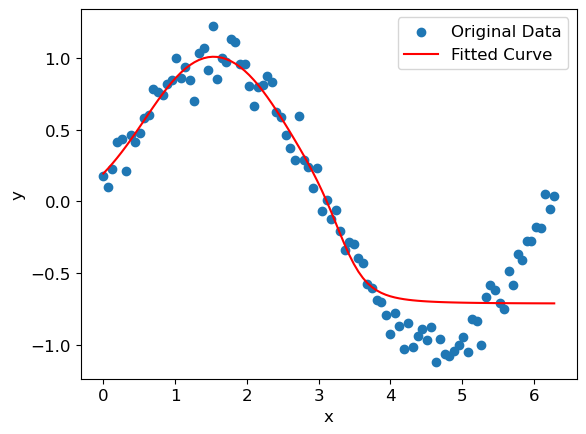

In [60]:
import torch.nn as nn
import torch.optim as optim

# Generate some noisy sine wave data
x = np.linspace(0, 2*np.pi, 100)
np.random.seed(0) # for getting out the same random variables every time (reproducability)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

#x: input data
#y: output data
#lambda_l1: LASSO regularization parameter
#optim_alg: choice of optimization algorithm 'LBFGS', 'Adam'
def my_nn(x,y,lambda_l1,optim_alg):
    # Convert the data to PyTorch tensors
    x_tensor = torch.from_numpy(x).float().unsqueeze(1)
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # Define the neural network model
    class SinNet(nn.Module):
        def __init__(self):
            super(SinNet, self).__init__()
            self.fc1 = nn.Linear(1, 10)   
            self.fc2 = nn.Linear(10, 10)
            self.fc3 = nn.Linear(10, 10)
            self.fc4 = nn.Linear(10, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.sigmoid(self.fc1(x))
            x = self.sigmoid(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            x = self.fc4(x)
            return x

    # Set a random seed for reproducibility, the same initial guess
    torch.manual_seed(0)
    
    # Create an instance of the SinNet model
    model = SinNet()  

    # Define the loss function
    criterion = nn.MSELoss()

    # Create a function for LBFGS closure

    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
    # Calculate the L1 regularization term
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, p=1)
    
        # Add the L1 regularization term to the loss
        loss += lambda_l1 * l1_regularization
        loss.backward()
        return loss

    
    prev_loss = float('inf')  # Initialize with a large value
    tolerance = 1.e-7
    max_no_epoch=1000

    if optim_alg=='LBFGS':
        optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)
    #alternatively:
    elif optim_alg=='Adam': 
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optim=='SGD': 
        optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

    


    # Training loop
    for epoch in range(max_no_epoch):
        def closure_wrapper():
            loss = closure()
            return loss
        optimizer.step(closure_wrapper)

    # Print the loss every 10th epoch
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")

        loss = closure()
    
        loss_change = prev_loss - loss.item()
        prev_loss = loss.item()
    
        # Check if the optimizer has converged (you can modify this condition)
    
        if optim_alg=='LBFGS':
            if loss_change < tolerance:
                print(f"Optimizer has converged. Stopping training.")
                break

    # Plot the original data and the fitted curve
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, model(x_tensor).detach().numpy(), 'r', label='Fitted Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    return model

optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0.0001  # You can adjust this value
mymodel=my_nn(x,y,lambda_l1,optim_alg)



How to get out model parameters fron a trained NN

In [61]:

# Now we access the model parameters via the model's state_dict
model_state_dict = mymodel.state_dict()
# Get specific parameter values
fc1_weights = model_state_dict['fc1.weight']
fc1_biases = model_state_dict['fc1.bias']
fc2_weights = model_state_dict['fc2.weight']
fc2_biases = model_state_dict['fc2.bias']
fc3_weights = model_state_dict['fc3.weight']
fc3_biases = model_state_dict['fc3.bias']
fc4_weights = model_state_dict['fc4.weight']
fc4_biases = model_state_dict['fc4.bias']
# Convert these tensors to numpy arrays for further analysis if needed
fc1_weights_np = fc1_weights.numpy()
fc1_biases_np = fc1_biases.numpy()
fc2_weights_np = fc2_weights.numpy()
fc2_biases_np = fc2_biases.numpy()
fc3_weights_np = fc3_weights.numpy()
fc3_biases_np = fc3_biases.numpy()
fc4_weights_np = fc4_weights.numpy()
fc4_biases_np = fc4_biases.numpy()



If you want to set NN model parameters and use for prediction

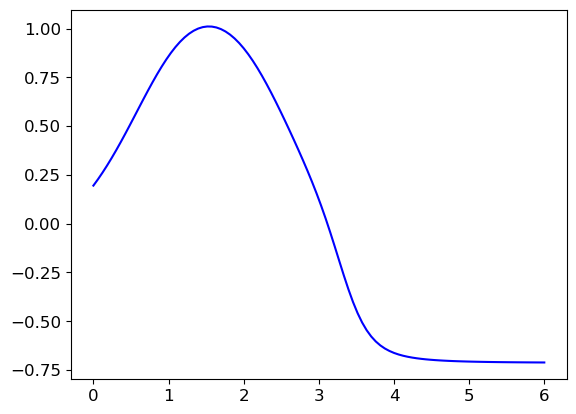

In [62]:
custom_params = {
    'fc1.weight': torch.tensor(fc1_weights_np, dtype=torch.float32),
    'fc1.bias': torch.tensor(fc1_biases_np, dtype=torch.float32),
    'fc2.weight': torch.tensor(fc2_weights_np, dtype=torch.float32),
    'fc2.bias': torch.tensor(fc2_biases_np, dtype=torch.float32),
    'fc3.weight': torch.tensor(fc3_weights_np, dtype=torch.float32),
    'fc3.bias': torch.tensor(fc3_biases_np, dtype=torch.float32),
    'fc4.weight': torch.tensor(fc4_weights_np, dtype=torch.float32),
    'fc4.bias': torch.tensor(fc4_biases_np, dtype=torch.float32)
}

# Set the model's state_dict to the custom parameter values
mymodel.load_state_dict(custom_params)

# Make a prediction
xmax=0.
xmin=6.
xplot=np.linspace(xmin,xmax,100)
xplot_tensor = torch.from_numpy(xplot).float().unsqueeze(1)
plt.plot(xplot_tensor.detach().numpy(), mymodel(xplot_tensor).detach().numpy(), 'b-', label='My NN')
plt.show()

## Examples of other NN classes

In [63]:
# Example 1
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x


# Define custom activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x


# Example 2
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        # Layer 1:
        self.layer1 = nn.Linear(in_features=nn_input.shape[1], out_features=10)
        # Layer 2:
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        # Layer 3:
        self.layer3 = nn.Linear(in_features=10, out_features=3)  # 3 output features

    def forward(self, x):
        # Layer 1:
        x = logsig(self.layer1(x))
        # Layer 2:
        x = radbas(self.layer2(x))
        # Layer 3:
        x = purelin(self.layer3(x))
        return x
    

#Example 3
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 10)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(10, 1)  # Fully connected layer with 10 input and 1 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    


## Example classification with NN

In [64]:
# Generate synthetic data
np.random.seed(0)
num_samples = 100
num_features = 2

class_0 = np.random.randn(num_samples // 2, num_features) + np.array([-1, -1])  #random numers around -1,-1
class_1 = np.random.randn(num_samples // 2, num_features) + np.array([1, 1])    #random numers around 1,1


x = np.vstack((class_0, class_1))
y=np.zeros((num_samples,2))
y[0:num_samples//2,0]=1.
y[num_samples//2:,1]=1.

# Randomly shuffle the data
np.random.seed(0) # for getting out the same random variables every time (reproducability)
indices = np.random.permutation(num_samples)
# Split the dataset into training and testing sets (80% training, 20% testing)
split_ratio = 0.8
split_index = int(num_samples * split_ratio)

# Split the data based on the shuffled indices
x_train, x_test = x[indices[:split_index],:], x[indices[split_index:],:]
y_train, y_test = y[indices[:split_index],:], y[indices[split_index:],:]


# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)



# Initialize the model, loss function, and optimizer
input_size = num_features
output_size = 2  # Number of classes
model = SimpleNN(input_size, output_size)
criterion = nn.CrossEntropyLoss()   #here comes cross entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    probabilities=torch.softmax(outputs, dim=1)   #here comes softmax function 
    loss = criterion(probabilities, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Model evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_test_tensor)
    probabilities=torch.softmax(outputs, dim=1)
    predicted_classes=torch.argmax(probabilities, dim=1)
    test_classes=torch.argmax(y_test_tensor, dim=1)
accuracy = torch.sum(predicted_classes == test_classes).item() / y_test_tensor.size(0)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch [100/1000], Loss: 0.9007
Epoch [200/1000], Loss: 0.6607
Epoch [300/1000], Loss: 0.5352
Epoch [400/1000], Loss: 0.4895
Epoch [500/1000], Loss: 0.4670
Epoch [600/1000], Loss: 0.4536
Epoch [700/1000], Loss: 0.4446
Epoch [800/1000], Loss: 0.4381
Epoch [900/1000], Loss: 0.4332
Epoch [1000/1000], Loss: 0.4293
Accuracy: 95.00%


## Example Lorenz ODE system

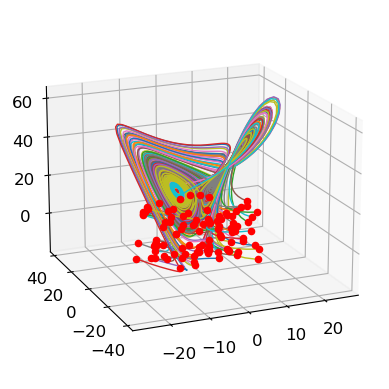

Epoch [100/800], Loss: 138.5281
Epoch [200/800], Loss: 65.5920
Epoch [300/800], Loss: 32.2044
Epoch [400/800], Loss: 18.3496
Epoch [500/800], Loss: 12.2165
Epoch [600/800], Loss: 8.9442
Epoch [700/800], Loss: 7.0184
Epoch [800/800], Loss: 5.5444


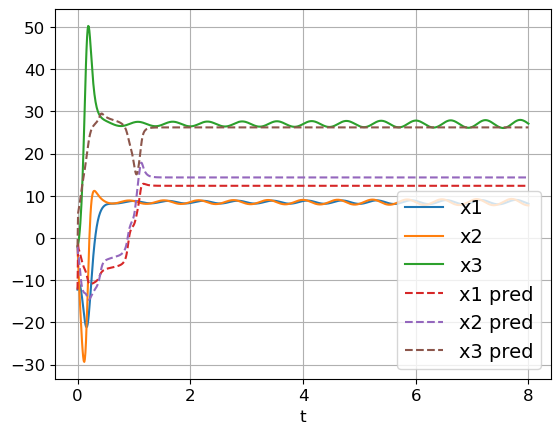

In [65]:
from scipy import integrate
## Simulate the Lorenz System
dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)   #sampling time 0.01, gives 801 timesteps
beta = 8/3
sigma = 10
rho = 28

#define sizes of input and output matrices
nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))  #100 different initial conditions

#x_t: 100 x 801 x 3
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])   #here the ode is solved for all initial conditions

#save to input and output matrices
m=0
for j in range(100): #loop over initial conditions
    #nn_input 80000 x 3
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,0:800,:] #x_t[j,:-1,:]
    #nn_output 80000 x 3
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:801,:] #x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()



# Convert data to PyTorch tensors
nn_input = torch.tensor(nn_input, dtype=torch.float32).clone().detach()
nn_output = torch.tensor(nn_output, dtype=torch.float32).clone().detach()


# Instantiate the custom neural network
model = CustomNet()

# Define the optimizer
adam_optimizer = optim.Adam(model.parameters(), lr=0.01) #, weight_decay=0.00001)  #optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Define the loss function (use Mean Squared Error for regression)
criterion = nn.MSELoss()

# Training loop
num_epochs = 800
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(nn_input)
    
    # Calculate the loss
    loss = criterion(outputs, nn_output)
    
    # Backpropagation and optimization
    adam_optimizer.zero_grad()
    loss.backward()
    adam_optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

fig, ax = plt.subplots()
rcParams["font.size"] = 14

ax.plot(t,x_t[10,:,0],linestyle='-',label='x1')
ax.plot(t,x_t[10,:,1],linestyle='-',label='x2')
ax.plot(t,x_t[10,:,2],linestyle='-',label='x3')
ax.set_xlabel('t')
ax.grid(visible=True)


# Set the model to evaluation mode
model.eval()
#choose for example 10th initial value x0
xx=torch.tensor(x0[10,:], dtype=torch.float32).clone().detach()
xpred=np.zeros((len(t),3))
#loop over time
for i in range(len(t)):
    xpred[i,:]=xx.numpy()
    with torch.no_grad():
        predictions = model(xx)
    xx=predictions
    
ax.plot(t,xpred[:,0],linestyle='--',label='x1 pred')
ax.plot(t,xpred[:,1],linestyle='--',label='x2 pred')
ax.plot(t,xpred[:,2],linestyle='--',label='x3 pred')
ax.legend(loc='best')
plt.show()

## Function for derivative w.r.t. $x$

In [66]:
#%%  a function to get_derivative, from Kollmannsberger et al.
dtype = torch.float
device = torch.device("cpu")
from torch.autograd import grad

def get_derivative(y, x, n):
    """Compute the nth order derivative of y = f(x) with respect to x."""
    if n == 0:
        return y
    else:
        dy_dx = grad(y, x, torch.ones(x.size()[0], 1, device=device), create_graph=True, retain_graph=True)[0]
        return get_derivative(dy_dx, x, n - 1)

## Example PINN, solution of d.e.

Epoch [1], Loss: 14801.4434
Epoch [2], Loss: 14790.2607
Epoch [3], Loss: 14780.0703
Epoch [4], Loss: 14770.7734
Epoch [5], Loss: 14762.1738
Epoch [6], Loss: 14754.0430
Epoch [7], Loss: 14746.1348
Epoch [8], Loss: 14738.1592
Epoch [9], Loss: 14729.8174
Epoch [10], Loss: 14720.8711
Epoch [11], Loss: 14711.1465
Epoch [12], Loss: 14700.5605
Epoch [13], Loss: 14689.0869
Epoch [14], Loss: 14676.7158
Epoch [15], Loss: 14663.4482
Epoch [16], Loss: 14649.2480
Epoch [17], Loss: 14634.0391
Epoch [18], Loss: 14617.7266
Epoch [19], Loss: 14600.2109
Epoch [20], Loss: 14581.4033
Epoch [21], Loss: 14561.2275
Epoch [22], Loss: 14539.6191
Epoch [23], Loss: 14516.5156
Epoch [24], Loss: 14491.8633
Epoch [25], Loss: 14465.6055
Epoch [26], Loss: 14437.6885
Epoch [27], Loss: 14408.0635
Epoch [28], Loss: 14376.6777
Epoch [29], Loss: 14343.4717
Epoch [30], Loss: 14308.3838
Epoch [31], Loss: 14271.3330
Epoch [32], Loss: 14232.2314
Epoch [33], Loss: 14190.9629
Epoch [34], Loss: 14147.4023
Epoch [35], Loss: 14101

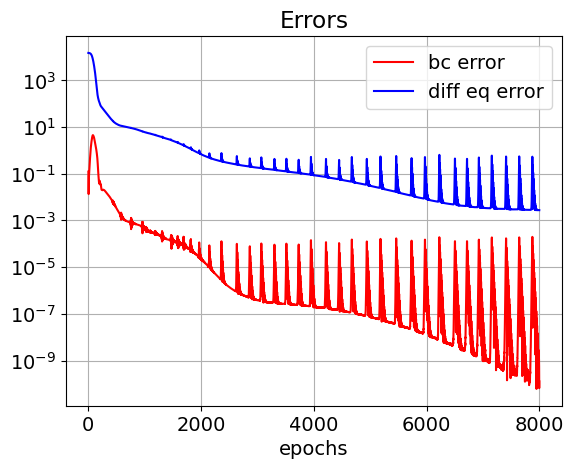

<function matplotlib.pyplot.show(close=None, block=None)>

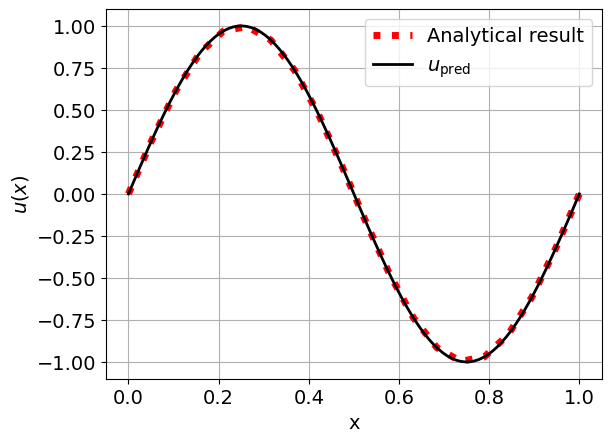

In [67]:
# Create an instance of the MyNet model
model = MyNet()

#%%  Analytical solution
u_analytic = lambda x: np.sin(2 * np.pi * x / L)

# Problem data
#define anonymous (lambda) functions
E = lambda x: 1
A = lambda x: 1
L = 1
u0 = [0,0]  # Dirichlet boundary conditions for both edges
#define anonymous (lambda) function
distLoad = lambda x: 4 * np.pi**2 * E(x) * A(x) / L**2 * torch.sin(2 * np.pi * x / L)


x = torch.linspace(0, L, 100, requires_grad=True).view((-1, 1))


#%% Define loss function
def criterion(x, u_pred):
        """Compute the cost function."""
        # Differential equation loss
        du_dx=get_derivative(u_pred, x, 1)
        differential_equation_loss = get_derivative( E(x) * A(x) * du_dx,x,1)   + distLoad(x)
        differential_equation_loss = torch.sum(differential_equation_loss ** 2)
        # Boundary condition loss initialization
        boundary_condition_loss = 0
        # Sum over dirichlet boundary condition losses
        boundary_condition_loss += (u_pred[0] - u0[0]) ** 2
        boundary_condition_loss += (u_pred[-1] -u0[1]) ** 2
        
        return differential_equation_loss, boundary_condition_loss


#%% function for closure
def closure(x_tensor):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    outputs = model(x_tensor)  #get displacements frp
    loss_de,loss_bc = criterion(x_tensor, outputs) # Compute the loss
    loss = loss_de+100.*loss_bc
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss += lambda_l1 * l1_regularization # Compute the loss
    loss.backward() # Compute gradients using backpropagation
    return loss,loss_de,loss_bc

#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='Adam'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

#training points for the d.e.
x = torch.linspace(0, L, 20, requires_grad=True).view((-1, 1))

#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
boundary_condition_loss_history = np.zeros(max_no_epoch)

def closure_wrapper():
        loss,loss_de,loss_bc = closure(x)
        differential_equation_loss_history[epoch] += loss_de.item()
        boundary_condition_loss_history[epoch] += loss_bc.item()
        return loss 


# Training loop
for epoch in range(max_no_epoch):
    
    loss=optimizer.step(closure_wrapper)
    
# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break

#%% plot loss function
fig, ax = plt.subplots(nrows=1, ncols=1) # Create a figure with one subplot
ax.semilogy(np.arange(len(boundary_condition_loss_history)), boundary_condition_loss_history,color='red', label='bc error')
ax.semilogy(np.arange(len(boundary_condition_loss_history)), differential_equation_loss_history,color='blue',label="diff eq error")
plt.xlabel(r'epochs')
ax.set_title(r'Errors')
ax.grid(visible=True)
ax.legend(loc='best') 
plt.show()

#%%plot predicted results and analytical solution
u_analytic = lambda x: torch.sin(2 * np.pi * x / L)
fig, ax = plt.subplots(nrows=1, ncols=1) # Create a figure with one subplot
ax.plot(x.detach().numpy(), u_analytic(x).detach().numpy(),color='r',linestyle=':',linewidth=5, label='Analytical result')
x = torch.linspace(0, L, 100, requires_grad=True).view((-1, 1))
pred_displacements = model(x)  #get displacements
ax.plot(x.detach().numpy(), pred_displacements.detach().numpy(),color='k',linestyle='-',linewidth=2, label="$u_{\mathrm{pred}}$")
ax.legend(loc='best') 
plt.xlabel('x')
plt.ylabel('$u(x)$')   
ax.grid(visible=True)
plt.show

## Example PINN: inverse problem

Epoch [1], Loss: 5621.2515
Epoch [2], Loss: 0.0025
Epoch [3], Loss: 0.0025
Epoch [4], Loss: 0.0025
Epoch [5], Loss: 0.0024
Epoch [6], Loss: 0.0023
Epoch [7], Loss: 0.0023
Epoch [8], Loss: 0.0023
Epoch [9], Loss: 0.0014
Epoch [10], Loss: 0.0014
Epoch [11], Loss: 0.0014
Epoch [12], Loss: 0.0014
Epoch [13], Loss: 0.0014
Epoch [14], Loss: 0.0014
Epoch [15], Loss: 0.0014
Epoch [16], Loss: 0.0014
Epoch [17], Loss: 0.0014
Optimizer has converged. Stopping training.


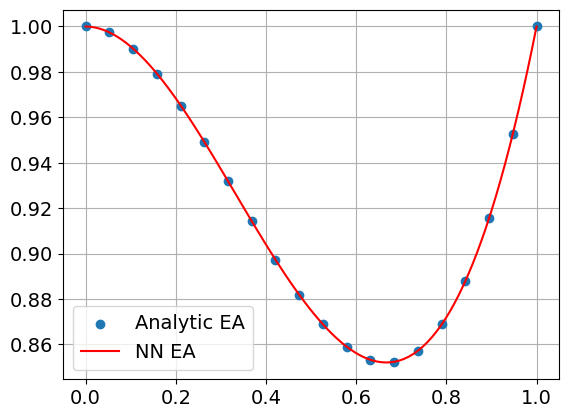

In [68]:
#%% Problem data
N = 20
L = 1

def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)


x = generate_grid_1d(L, N)
u_analytic = lambda x: torch.sin(2*np.pi*x)

distLoad = lambda x: -2*(3*x**2 - 2*x)*np.pi*torch.cos(2*np.pi*x) + 4*(x**3 - x**2 + 1)*np.pi**2*torch.sin(2*np.pi*x)

class pinnModel(nn.Module):
    def __init__(self):
        super(pinnModel, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 10)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(10, 1)  # Fully connected layer with 10 input and 1 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    
# Create an instance of the SinNet model
model = pinnModel()

#%% Define loss function
def criterion(model,x):
        """Compute the cost function."""
        u=u_analytic(x)
        strain=get_derivative(u, x, 1)
        EA=model(x)
        N = EA * strain      # normal force
        # Differential equation loss
        differential_equation_loss = get_derivative(N, x, 1)  + distLoad(x)
        differential_equation_loss = torch.sum(differential_equation_loss ** 2).view(1)
        
        return differential_equation_loss

#%% function for closure
# Create a function for closure
def closure(x_tensor):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    loss_de = criterion(model,x_tensor) # Compute the loss
    loss = loss_de
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss += lambda_l1 * l1_regularization # Compute the loss
    loss.backward() # Compute gradients using backpropagation
    return loss,loss_de

#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='LBFGS'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)


#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
# Training loop
for epoch in range(max_no_epoch):
    def closure_wrapper():
        loss,loss_de = closure(x)
        differential_equation_loss_history[epoch] += loss_de.item()
        return loss 
    loss=optimizer.step(closure_wrapper)

# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break

#%% plot result
EA_analytic = lambda x: x**3 - x**2 + 1
#
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(x.detach().numpy(), EA_analytic(x).detach().numpy(), label='Analytic EA')
#
#x_dense_tensor=torch.tensor(xdense, requires_grad=True).float().unsqueeze(1)
xdense = generate_grid_1d(L, 100)
pred_EA=model(xdense)

plt.plot(xdense.detach().numpy(),pred_EA.detach().numpy(), 'r', label='NN EA')
ax.legend(loc='best')
ax.grid(visible=True)
plt.show()

## Example PINN data and d.e.

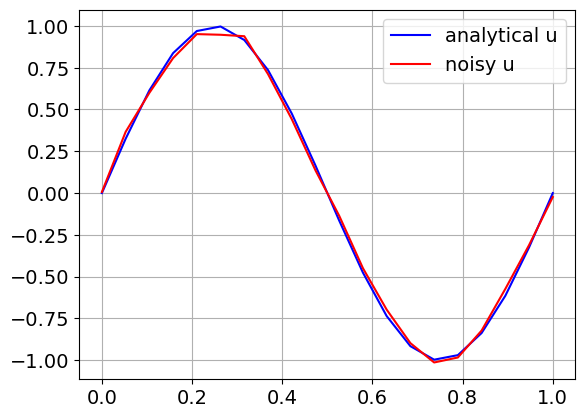

Epoch [1], Loss: 12770.2402
Epoch [2], Loss: 0.0947
Epoch [3], Loss: 0.0946
Epoch [4], Loss: 0.0945
Epoch [5], Loss: 0.0739
Epoch [6], Loss: 0.0736
Epoch [7], Loss: 0.0735
Epoch [8], Loss: 0.0734
Epoch [9], Loss: 0.0733
Epoch [10], Loss: 0.0733
Epoch [11], Loss: 0.0732
Epoch [12], Loss: 0.0731
Epoch [13], Loss: 0.0731
Epoch [14], Loss: 0.0731
Epoch [15], Loss: 0.0731
Epoch [16], Loss: 0.0731
Optimizer has converged. Stopping training.


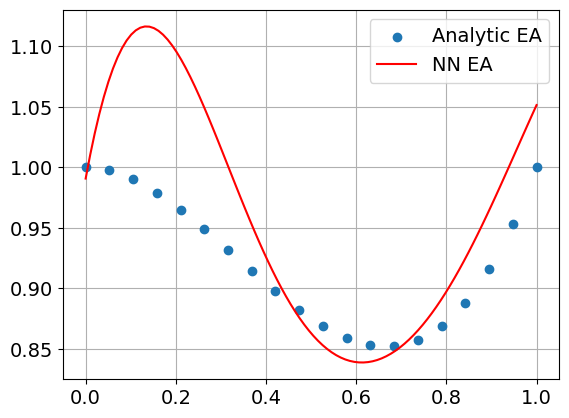

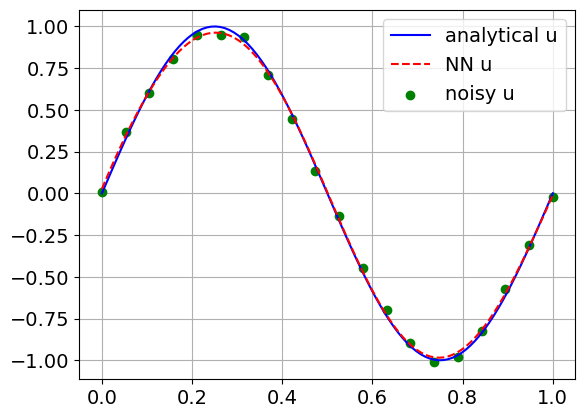

In [69]:
u_random=u_analytic(x) + 0.1 * (torch.rand(len(x), 1) - 0.5).type(torch.FloatTensor)
#print(u_random)

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.plot(x.detach().numpy(),u_analytic(x).detach().numpy(),color='blue',label='analytical u')
plt.plot(x.detach().numpy(),u_random.detach().numpy(),color='red',label='noisy u')
ax.grid(visible=True)
ax.legend(loc='best') 
plt.show()

def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)

class pinnModel(nn.Module):
    def __init__(self):
        super(pinnModel, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 20)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(20, 2)  # Fully connected layer with 10 input and 2 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    
# Create an instance of the pinnModel model
model = pinnModel()

def closure(x):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    output_tensor =model(x)
    u, EA=torch.split(output_tensor,1,dim=1)
    strain=get_derivative(u, x, 1)
    N=EA*strain
    # Differential equation loss
    loss_de = get_derivative(N, x, 1) + distLoad(x)
    loss_de = torch.sum(loss_de ** 2).view(1)
    #measurement points loss
    MSEcriterion = nn.MSELoss()
    mse_loss = MSEcriterion(u, u_random)
    
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss = loss_de+100.*mse_loss+ lambda_l1 * l1_regularization # Compute the loss
    loss.backward(retain_graph=True) # Compute gradients using backpropagation
    # Manually release the computation graph
    #del loss, loss_de, mse_loss, l1_regularization
    return loss,loss_de


#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='LBFGS'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)


#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
# Training loop
for epoch in range(max_no_epoch):
    def closure_wrapper():
        loss,loss_de = closure(x)
        differential_equation_loss_history[epoch] = loss_de.item()
        return loss 
    loss=optimizer.step(closure_wrapper)
    
# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break


output_tensor =model(x)
u, EA=torch.split(output_tensor,1,dim=1)

#%% plot result
EA_analytic = lambda x: x**3 - x**2 + 1
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(x.detach().numpy(), EA_analytic(x).detach().numpy(), label='Analytic EA')
#
xdense = generate_grid_1d(L, 100)
output_tensor =model(xdense)
u, EA=torch.split(output_tensor,1,dim=1)

plt.plot(xdense.detach().numpy(),EA.detach().numpy(), 'r', label='NN EA')
ax.grid(visible=True)
ax.legend(loc='best')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.plot(xdense.detach().numpy(),u_analytic(xdense).detach().numpy(),color='blue',label='analytical u')
plt.plot(xdense.detach().numpy(),u.detach().numpy(),color='red',linestyle='--',label='NN u')
plt.scatter(x.detach().numpy(),u_random.detach().numpy(),color='green',label='noisy u')
ax.grid(visible=True)
ax.legend(loc='best') 
plt.show()


Epoch [1], Loss: 12763.6494
Epoch [2], Loss: 0.1257
Epoch [3], Loss: 0.1251
Epoch [4], Loss: 0.1251
Epoch [5], Loss: 0.1250
Epoch [6], Loss: 0.1250
Epoch [7], Loss: 0.1250
Epoch [8], Loss: 0.1249
Epoch [9], Loss: 0.1249
Epoch [10], Loss: 0.1249
Epoch [11], Loss: 0.1248
Epoch [12], Loss: 0.1246
Epoch [13], Loss: 0.1246
Epoch [14], Loss: 0.1246
Epoch [15], Loss: 0.1246
Epoch [16], Loss: 0.1246
Optimizer has converged. Stopping training.


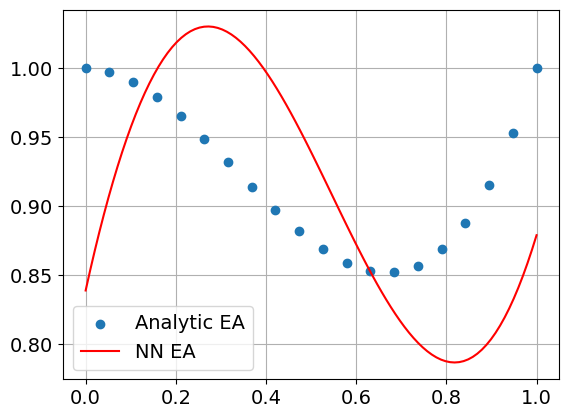

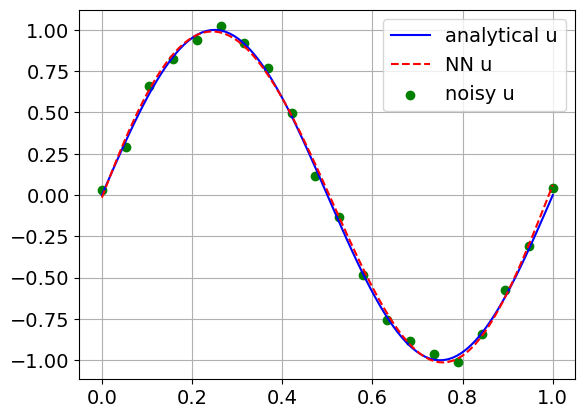